In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

plt.rc('axes', titlesize=20)
plt.rc('figure', figsize=(16, 10))

In [2]:
df = pd.read_csv("stats.csv", index_col="date", parse_dates=['date'], infer_datetime_format=True)
cases_df = df.loc[:, ["cases", "deaths"]]
tests_df = df.loc[:, ["cases", "test_total"]]

evolution_df = df.diff()[["cases", "deaths", "test_total"]].iloc[1:]

In [3]:
smas = pd.DataFrame()
smas["cases_SMA_7"] = evolution_df["cases"].rolling(window=7).mean()
smas["cases_SMA_21"] = evolution_df["cases"].rolling(window=21).mean()

smas["deaths_SMA_7"] = evolution_df["deaths"].rolling(window=7).mean()
smas["deaths_SMA_21"] = evolution_df["deaths"].rolling(window=21).mean()

def to_pct_string(frame):
    new_frame = pd.DataFrame()
    for column in frame.columns:
        new_frame[column] = pd.Series(["{0:.2f}%".format(val * 100) for val in frame[column]], index = frame.index)
    return new_frame

# Evolution Charts

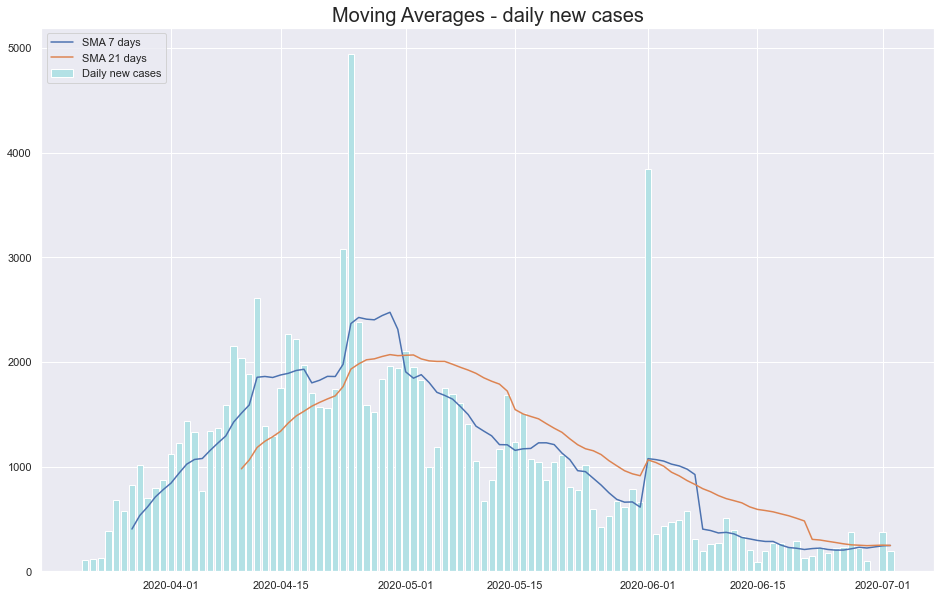

In [4]:
@interact
def show_change_chart(days=widgets.IntSlider(min=1, max=len(smas), value=len(smas)), 
                      show_cases=True, 
                      show_deaths=False,
                      show_totals=widgets.ToggleButtons(options=['All', 'None', 'Cases', 'Deaths'], value='Cases')):
    data = smas.iloc[-days:]
    evolution_local = evolution_df.iloc[-days:]
    if show_cases:
        plt.plot(data["cases_SMA_7"], label="SMA 7 days")
        plt.plot(data["cases_SMA_21"], label="SMA 21 days")
        
    if show_deaths:
        plt.plot(data["deaths_SMA_7"], label="SMA 7 days")
        plt.plot(data["deaths_SMA_21"], label="SMA 21 days")
        
    if show_totals in ['All', 'Cases']:
        plt.bar(evolution_local.index, evolution_local["cases"], label="Daily new cases", color="#b3e1e5")
        
    if show_totals in ['All', 'Deaths']:
        plt.bar(evolution_local.index, evolution_local["deaths"], label="Daily deaths", color="#facfee")
        
    plt.legend(loc=2)
    plt.title("Moving Averages - daily new cases")
    plt.show()

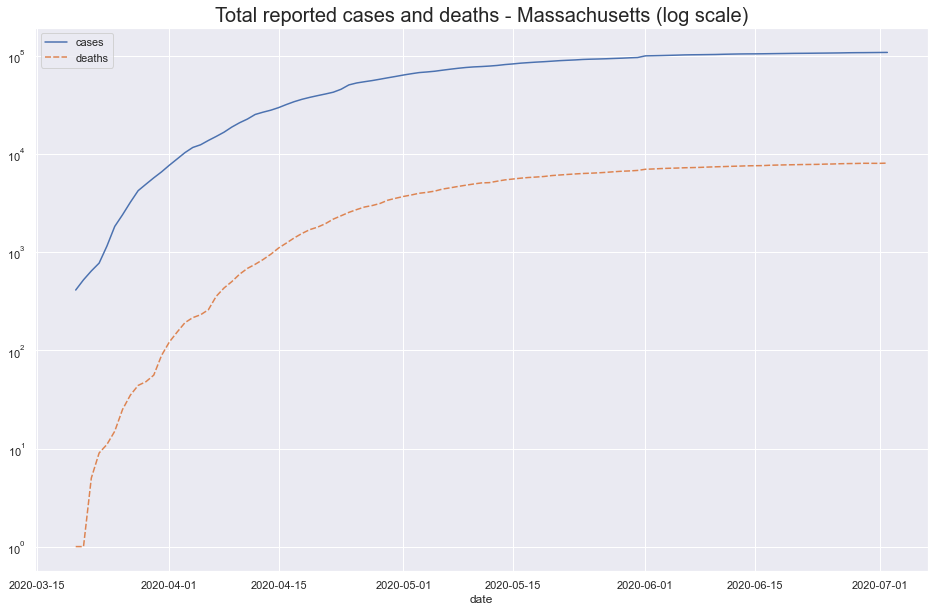

In [5]:
# plt.figure(figsize=(16, 10))

@interact
def show_cases(scale=['log', 'linear']):
    ax = sns.lineplot(data=cases_df)
    ax.set_yscale(scale)

    plt.title("Total reported cases and deaths - Massachusetts ({} scale)".format(scale))
    plt.show()

In [6]:
@interact
def show_pct_change(days=widgets.IntSlider(min=0, max=len(smas), step=1, value=7)):
    return to_pct_string(smas.pct_change().iloc[-days:])

,cases_SMA_7,cases_SMA_21,deaths_SMA_7,deaths_SMA_21
date,,,,
2020-06-25,-3.08%,-4.07%,-5.39%,-3.05%
2020-06-26,0.35%,-4.52%,10.36%,2.10%
2020-06-27,6.13%,-3.66%,0.00%,-3.34%
2020-06-28,6.57%,-1.51%,-5.16%,-1.06%
2020-06-29,-2.99%,-1.70%,9.41%,-0.27%
2020-07-01,9.37%,2.18%,-13.57%,-9.30%
2020-07-02,1.35%,-1.37%,1.57%,0.74%


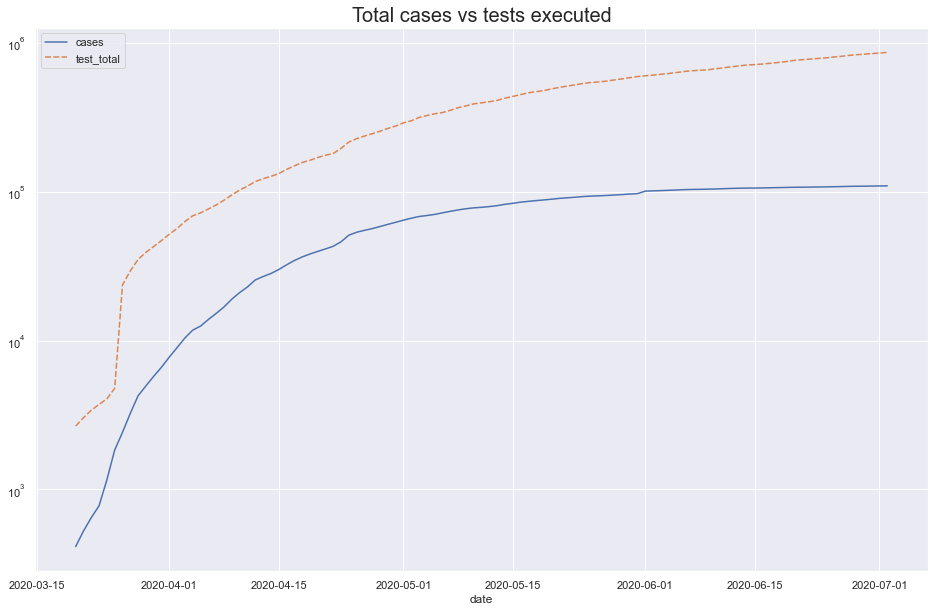

In [7]:
ax = sns.lineplot(data=tests_df)
ax.set_yscale("log")

plt.title("Total cases vs tests executed")

plt.show()

   # Data for the past week

## Daily new cases

In [8]:
@interact
def show_daily_stats(days=widgets.IntSlider(min=0, max=len(smas), step=1, value=7)):
    return evolution_df.iloc[-days:]

,cases,deaths,test_total
date,,,
2020-06-25,226.0,25.0,10318.0
2020-06-26,233.0,50.0,8545.0
2020-06-27,373.0,28.0,12189.0
2020-06-28,224.0,19.0,9391.0
2020-06-29,101.0,35.0,6481.0
2020-07-01,375.0,-14.0,16003.0
2020-07-02,195.0,51.0,7786.0


## Daily percent change

In [9]:
@interact
def show_daily_pct_change(days=widgets.IntSlider(min=0, max=len(smas), step=1, value=7)):
    return to_pct_string(df.pct_change().iloc[-7:])

,cases,deaths,test_positive,test_total
date,,,,
2020-06-25,0.21%,0.31%,0.21%,1.31%
2020-06-26,0.22%,0.63%,0.22%,1.07%
2020-06-27,0.35%,0.35%,0.35%,1.51%
2020-06-28,0.21%,0.24%,0.21%,1.14%
2020-06-29,0.09%,0.43%,0.09%,0.78%
2020-07-01,0.34%,-0.17%,0.34%,1.91%
2020-07-02,0.18%,0.63%,0.18%,0.91%
